In [ ]:
from IPython.display import clear_output
import sys
!pip install mteb
!pip install -q transformers accelerate bitsandbytes
! pip install git+https://github.com/simonzhang00/ripser-plusplus.git
! pip install git+https://github.com/IlyaTrofimov/RTD.git
!git clone https://github.com/mklabunde/resi.git
# !cd resi && pip install -r requirements.txt && pip install -e .
!pip install loguru
!pip install git+https://github.com/KhrulkovV/geometry-score.git
!pip install git+https://github.com/xgfs/imd.git
!pip install gudhi
!pip install hf_xet
sys.path.append('/content/resi/')
clear_output()

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from datasets import load_dataset
from tqdm.auto import tqdm
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import gc
import os
import cvxpy as cp


from typing import List
import mteb

import numpy as np
from tqdm.auto import tqdm
import json


from sklearn.decomposition import IncrementalPCA

In [ ]:
from repsim.measures import ALL_MEASURES
from repsim.measures import FUNCTIONAL_SIMILARITY_MEASURES

import pickle
def save_res(dct, path):
  with open(path, 'wb') as handle:
      pickle.dump(dct, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_res(path):
  try:
    with open(path, 'rb') as handle:
      results = pickle.load(handle)
  except:
    results = {}

  return results

2025-05-10 13:24:56.388 | INFO     | repsim.measures.rtd:__init__:56 - RTD will use cuda devices to compute barcodes. It is not possible to specify which GPU directly. Use the CUDA_VISIBLE_DEVICES environment variable to specify which GPU to use.
2025-05-10 13:24:56.389 | INFO     | repsim.measures.rtd:__init__:56 - RTD will use cuda devices to compute barcodes. It is not possible to specify which GPU directly. Use the CUDA_VISIBLE_DEVICES environment variable to specify which GPU to use.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Выбираем задачи из MTEB

In [ ]:
TASKS = ['MassiveIntentClassification', 'CUADCovenantNotToSueLegalBenchClassification',
         'FrenkEnClassification', 'LearnedHandsHousingLegalBenchClassification',
         'WikipediaSolidStateColloidalClassification']

## Классификация

In [ ]:
tasks_eng = mteb.get_tasks(task_types=["Classification"], languages=['eng'])

In [ ]:
# tasks_eng

In [ ]:
banking = mteb.get_task('Banking77Classification')
banking.load_data()

In [ ]:
banking.dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 10003
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 3080
    })
})

In [ ]:
len(np.unique(banking.dataset['train']['label']))

77

In [ ]:
imdb = mteb.get_task('ImdbClassification')
imdb.load_data()

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
imdb.dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 25000
    })
})

In [ ]:
len(np.unique(imdb.dataset['train']['label']))

2

In [ ]:
emotion = mteb.get_task('EmotionClassification')
emotion.load_data()

Repo card metadata block was not found. Setting CardData to empty.


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
emotion.dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
})

In [ ]:
len(np.unique(emotion.dataset['train']['label']))

6

## Retrieval

In [ ]:
tasks_eng = mteb.get_tasks(task_types=["Retrieval"], languages=['eng'])

In [ ]:
# tasks_eng

In [ ]:
wiki = mteb.get_task('LEMBWikimQARetrieval')
wiki.load_data()

Generating corpus split: 0 examples [00:00, ? examples/s]

Generating queries split: 0 examples [00:00, ? examples/s]

Generating qrels split: 0 examples [00:00, ? examples/s]

In [ ]:
corpus = wiki.corpus

In [ ]:
corpus.keys()

dict_keys(['test'])

In [ ]:
len(corpus['test'].keys())

300

In [ ]:
corpus['test']['doc_0']['text']

"Passage 1:\nMargaret, Countess of Brienne\nMarguerite d'Enghien (born 1365 - d. after 1394), was the ruling suo jure Countess of Brienne and of Conversano, suo jure Lady of Enghien, and Lady of Beauvois from 1394 until an unknown date.\n\nLife\nMarguerite was born in 1365, the eldest daughter of Louis of Enghien, Count of Brienne and Conversano, Lord of Enghien, Titular Duke of Athens, and Giovanna of Sanseverino. Marguerite had a brother, Antoine who died at the age of sixteen, leaving her, the eldest daughter, heir to her father's estates and titles.  \nShe inherited the counties of Brienne and of Conversano, and the Lordship of Enghien from her father Louis of Enghien on 17 March 1394. She was the wife of John of Luxembourg, Sire of Beauvois and the mother of Peter of Luxembourg, Count of Saint-Pol, Count of Brienne and of Conversano who inherited her fiefs, and John II of Luxembourg, Count of Ligny.\n\nReign\nMarguerite became the suo jure Countess of Brienne and Conversano, and D

In [ ]:
wiki.queries.keys()

dict_keys(['test'])

In [ ]:
len(wiki.queries['test'].keys())

300

In [ ]:
wiki.queries['test']['query_0']

'What is the award that the composer of song The Seeker (The Who Song) earned?'

In [ ]:
# query: doc
# wiki.relevant_docs['test']

In [ ]:
covid = mteb.get_task('TRECCOVID')
covid.load_data()

Generating corpus split:   0%|          | 0/171332 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/171332 [00:00<?, ? examples/s]

Generating queries split:   0%|          | 0/50 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/50 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/66336 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/66336 [00:00<?, ? examples/s]

Map:   0%|          | 0/66336 [00:00<?, ? examples/s]

Filter:   0%|          | 0/50 [00:00<?, ? examples/s]

In [ ]:
covid.queries['test'].keys(), covid.queries['test']['1'], covid.queries['test']['2']

(dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50']),
 'what is the origin of COVID-19',
 'how does the coronavirus respond to changes in the weather')

In [ ]:
len(covid.corpus['test'].keys())

171332

In [ ]:
len(covid.relevant_docs['test']['1'])

1565

In [ ]:
covid = mteb.get_task('TRECCOVID')
covid.load_data()

Summary: \
COVID: 171332 docs, 50 queries, на один вопрос много релевантных документов с метками 1,2 и тд\
LEMBWikimQARetrieval: 300 вопросов, 300 ответов, один к одному\


## STS + sentence_pairs

In [ ]:
tasks_eng = mteb.get_tasks(task_types=["STS"], languages=['eng'])

In [ ]:
tasks_eng

MTEBTasks(BiossesSTS(name='BIOSSES', languages=['eng']), SickrSTS(name='SICK-R', languages=['eng']), STS12STS(name='STS12', languages=['eng']), STS13STS(name='STS13', languages=['eng']), STS14STS(name='STS14', languages=['eng']), STS15STS(name='STS15', languages=['eng']), STS16STS(name='STS16', languages=['eng']), STSBenchmarkSTS(name='STSBenchmark', languages=['eng']), IndicCrosslingualSTS(name='IndicCrosslingualSTS', languages=['asm', 'ben', 'eng', '...']), SemRel24STS(name='SemRel24STS', languages=['eng']), STS17Crosslingual(name='STS17', languages=['ara', 'deu', 'eng', '...']), STS22CrosslingualSTSv2(name='STS22.v2', languages=['cmn', 'deu', 'eng', '...']), STSBenchmarkMultilingualSTS(name='STSBenchmarkMultilingualSTS', languages=['eng']))

In [ ]:
sts = mteb.get_task('STS14')
sts.load_data()

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
sts.dataset

DatasetDict({
    test: Dataset({
        features: ['split', 'sentence1', 'sentence2', 'score'],
        num_rows: 3750
    })
})

In [ ]:
#max score
sts.dataset['test']['sentence1'][5], sts.dataset['test']['sentence2'][5]

("go figure you 're asking me to prove a negative ?",
 "you 're asking me to prove a negative ?")

In [ ]:
tasks_eng = mteb.get_tasks(task_types=["Paraphrase"], languages=['eng'])

In [ ]:
# quora = mteb.get_task('QQP')

In [ ]:
from datasets import load_dataset
ds = load_dataset("allenai/c4", "en", split="train", streaming=True)
sample = ds.shuffle(buffer_size=100000, seed=42).take(100000)

Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

In [ ]:
next(iter(sample))

{'text': 'Showing "2500 Headlight" search results as seen on April 19, 2019.\nShop for 2500 Headlight - top sales, deals, offers, and 2500 Headlight discounts are available 24/7/365 at Shopneter.com.\nCustomers who search 2500 Headlight also buy this items: Miniature Snowman, 14k Gold Coin Bezel, Brass Shell Timbales.',
 'timestamp': '2019-04-19 12:44:43',
 'url': 'http://shopneter.com/2500-headlight.html'}

In [ ]:
from datasets import load_dataset

dbpedia = load_dataset("mteb/dbpedia")

In [ ]:
# dbpedia['test']['query-id']

In [ ]:
c4 = load_dataset("allenai/c4", 'en')

Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
ds = load_dataset("allenai/c4", "en", split="train", streaming=True)
sample = ds.shuffle(buffer_size=100000, seed=42).take(100000)

# Создаём итератор по батчам
batch_iterator = sample.iter(batch_size=10000)

# Получаем первый батч
batch32 = next(batch_iterator)
print(len(batch32["text"]))  # 32


Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

10000


In [ ]:
batch32['text'][0]

'Showing "2500 Headlight" search results as seen on April 19, 2019.\nShop for 2500 Headlight - top sales, deals, offers, and 2500 Headlight discounts are available 24/7/365 at Shopneter.com.\nCustomers who search 2500 Headlight also buy this items: Miniature Snowman, 14k Gold Coin Bezel, Brass Shell Timbales.'

In [ ]:
batch32['text'][1]

"GAME NOTES: The 10th-ranked Michigan Wolverines will attempt to keep their undefeated reign atop the Big Ten Conference standings alive on Sunday afternoon when they travel to Bloomington to take on the Indiana Hoosiers at Assembly Hall.\nMichigan is 8-0 in the Big Ten for the first time since the 1976-77 season and has won 10 straight overall, which is its second-longest winning streak under head coach John Beilein, falling short of only its 16-game run to start last season. The Wolverines success continued on Thursday night at home, as they improved to 16-4 following a 75-66 win over Purdue.\nIndiana is in the midst of a disappointing campaign by its lofty standards, as it is 13-8 overall and just 3-5 in league action. The Hoosiers have lost two of three, most recently dropping a 60-55 decision at Nebraska on Thursday, but they have defended their home floor well with wins in 11 of 13 matchups at Assembly Hall.\nThe Hoosiers have nearly doubled up the Wolverines in the all-time seri

In [ ]:
batch32['text'][2]

'Located in Melbourne, Tivoli Hi-Fi & Home Cinema are a family owned business who have not only lived through all the revolutions of the music industry, but have seen, sold and serviced every technology the hifi industry has put up. Our business is run and operated by music lovers, we listen to music, buy music, stream music and go to live music gigs, so our purpose is to help like-minded music lovers get the best home experience from their music and stock some of the best equipment in the world to achieve this.\nAt Tivoli Hi-Fi & Home Cinema we specialise in turntables, amplifiers, CD players, music streamers, televisions, headphones, DA converters and of course speakers of every shape and size, and have 9 display/demonstration rooms, a vast array of hifi to demonstrate, and can replace or add to your existing stereo or create whole systems. Whether you’re after straight forward invisible hifi, more advanced multi room digital music systems, or a totally bespoke home cinema let Tivoli

In [ ]:
batch32['text'][3]

'Regular price $65.00. Select colors on sale!\nSmooth cups and a comfortable fit make our Top Tier T-Shirt Bra perfect for every day.\nElegant, sophisticated, and oh-so comfortable, this is the ultimate everday t-shirt bra. Smooth cups and superior support make our Top Tier Underwire T-Shirt Bra the perfect companion for almost any knit, tee, or close-fitting top.'

In [ ]:
Как думаешь для построения похожестей слоев норм просто взять универсальный датасет типа C4, который содержит очень разнообразные примеры, брать оттуда батчи случайные, считать по ним метрики, потом по батчам усреднять.
типо вот так


In [ ]:
ds = load_dataset("allenai/c4", "en", split="train", streaming=True)


In [ ]:
ds = load_dataset("allenai/c4", "en", split="train", streaming=True)

all_texts = []
for i in range(10):

  ds_shuffled = ds.shuffle(buffer_size=10_000, seed=42)


  sample = ds_shuffled.take(10_000)
  batch = [s['text'] for s in sample]
  all_texts += batch

Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

In [ ]:
len(all_texts)

100000

In [ ]:
from datasets import load_dataset

# 1. Подгружаем и перемешиваем буфером 100 000 сразу
ds = load_dataset("allenai/c4", "en", split="train", streaming=True)
ds_shuffled = ds.shuffle(buffer_size=100_000, seed=42)

# 2. Берём сразу 100 000 примеров
sample_100k = ds_shuffled.take(100_000)
all_texts = [ex["text"] for ex in sample_100k]

Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

In [ ]:
all_texts[6]

'A beautifully manufactured 90 degree die grinder that’s a sheer joy to use. It’s less than 6” long and fits comfortably in the hand for extended use without discomfort. Use it with rotary files, or Scotch-Brite Roloc discs to shape and polish your work.\nAllows you to use any type of cutoff wheel with your 1/4" collet die grinder. The complete arbor set includes the shank and two screw mandrels for 1/4" and 3/8" hole sizes.\nSwivel action - makes deburring and countersink holes fast and easy. Molded handle with 2” long plated steel shaft with 1/4”-28 threaded holder. Includes (1) 3/8” X 100° 3-flute burring cutter and 8” extension shaft for deburring.'

# Считаем метрики похожести разных слоев модели

Тексты для расчета

In [ ]:
from datasets import load_dataset

# 1. Подгружаем и перемешиваем буфером 100 000 сразу
ds = load_dataset("allenai/c4", "en", split="train", streaming=True)
ds_shuffled = ds.shuffle(buffer_size=20_000, seed=42)

# 2. Берём сразу 100 000 примеров
sample = ds_shuffled.take(20_000)
texts = [ex["text"] for ex in sample]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

In [ ]:
del ds
torch.cuda.empty_cache()

In [ ]:

# ─────────────────────────────────────────────────────────────
# 1. Конфигурация
# ─────────────────────────────────────────────────────────────
MODEL_NAME = "bert-base-uncased"
SAVE_DIR   = "bert_embeddings_batch"
os.makedirs(SAVE_DIR, exist_ok=True)

BATCH_SIZE = 64        # BERT-base маленькая, можно смело 32–64
MAX_LEN    = 256

# ─────────────────────────────────────────────────────────────
# 2. Загрузка модели и токенизатора
# ─────────────────────────────────────────────────────────────
device = "cuda" if torch.cuda.is_available() else "cpu"

model = AutoModel.from_pretrained(
    MODEL_NAME,
    output_hidden_states=True,
    # torch_dtype=torch.float16 if device == "cuda" else torch.float32,
    device_map="auto" if device == "cuda" else None,
).eval()

tokenizer = AutoTokenizer.from_pretrained(
    MODEL_NAME,
    padding_side="right",
    use_fast=True
)

num_layers = model.config.num_hidden_layers + 1   # 13 для BERT-base

# ─────────────────────────────────────────────────────────────
# 3. Вычисляем и сохраняем эмбеддинги
# ─────────────────────────────────────────────────────────────
problem_batches = []

for batch_idx in tqdm(range(0, len(texts), BATCH_SIZE),
                      total=(len(texts)+BATCH_SIZE-1)//BATCH_SIZE):

    batch_texts = texts[batch_idx : batch_idx + BATCH_SIZE]

    encoded = tokenizer(
        batch_texts,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=MAX_LEN
    ).to(model.device)

    with torch.no_grad():                 # BERT-base → fp16 optional
        outputs = model(**encoded)

    # Сохраняем все скрытые слои
    for layer_idx, hs in enumerate(outputs.hidden_states):  # hs: [B,L,H]
        mask     = encoded.attention_mask.unsqueeze(-1).to(hs.dtype)
        avg_emb  = (hs * mask).sum(1) / mask.sum(1)
        embeddings = avg_emb.cpu()

        if torch.isinf(avg_emb).any():
            problem_batches.append(batch_idx)

        layer_dir = os.path.join(SAVE_DIR, f"layer_{layer_idx}")
        os.makedirs(layer_dir, exist_ok=True)
        torch.save(embeddings, os.path.join(layer_dir,
                                            f"batch_{batch_idx}.pt"))

    # очистка
    del outputs, encoded, embeddings
    gc.collect(); torch.cuda.empty_cache()

if problem_batches:
    print("Найдены inf в батчах:", problem_batches)
print(f"Все эмбеддинги сохранены в {SAVE_DIR}")


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Все эмбеддинги сохранены в bert_embeddings_batch


In [ ]:
def load_layer_embeddings(layer_idx):
    layer_dir = os.path.join(SAVE_DIR, f"layer_{layer_idx}")
    batch_files = sorted(os.listdir(layer_dir), key=lambda x: int(x.split('_')[1].split('.')[0]))
    return torch.cat([torch.load(os.path.join(layer_dir, f)) for f in batch_files], dim=0)

In [ ]:
for layer_idx in range(num_layers):
  a = load_layer_embeddings(layer_idx)
  if torch.isinf(a).sum() != 0:
    print(f"INF layer, {layer_idx}")
  if torch.isnan(a).sum() != 0:
    print(f"NANS layer, {layer_idx}")

In [ ]:
import logging
from datetime import datetime
import numpy as np
import torch
import gc

# === Настройка логгера ===
def setup_logging(log_file):
    logger = logging.getLogger("metrics_logger")
    logger.setLevel(logging.INFO)

    if logger.hasHandlers():
        logger.handlers.clear()

    formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

    file_handler = logging.FileHandler(log_file, mode='w')
    file_handler.setFormatter(formatter)

    console_handler = logging.StreamHandler()
    console_handler.setFormatter(formatter)

    logger.addHandler(file_handler)
    logger.addHandler(console_handler)

    return logger

# === Подсчет метрики ===
def calculate_metric(a, b, metric_name, batch_size=1000, trials=10):
    cls = ALL_MEASURES[metric_name]
    metrics = []

    for i in range(trials):
        idx = np.random.permutation(a.shape[0])[:batch_size]
        metric = cls(a[idx], b[idx], shape='nd')
        metrics.append(metric)

    return np.mean(metrics), np.std(metrics)

In [ ]:
PATH = '/content/drive/MyDrive/PTLS/NLP/BERT_BASE_UNCASED_SIM/'
LOG_FILE = 'similarity_metrics.log'

In [ ]:
# === Константы ===
METRICS = ['CKA', 'RSA', 'JaccardSimilarity', 'DistanceCorrelation']

# === Инициализация логгера ===
logger = setup_logging(LOG_FILE)

# === Основной процесс ===
try:
    logger.info("=== Start metrics calculation ===")
    logger.info(f"Metrics to compute: {', '.join(METRICS)}")
    start_time = datetime.now()

    for metric_name in METRICS:
        metric_start = datetime.now()
        logger.info(f"{'='*40}\nProcessing: {metric_name}")

        matrix = np.zeros((num_layers, num_layers))
        matrix_std = np.zeros((num_layers, num_layers))

        for i in range(num_layers):
            a = load_layer_embeddings(i)
            logger.info(f"Layer {i} | Shape: {a.shape}")

            for j in range(i, num_layers):
                b = load_layer_embeddings(j)

                try:
                    metr, metr_std = calculate_metric(a.float(), b.float(), metric_name, batch_size=3000, trials=5)
                    matrix[i, j] = matrix[j, i] = metr
                    matrix_std[i, j] = matrix_std[j, i] = metr_std

                    logger.info(f"{metric_name} | L{i}-L{j}: {metr:.4f} ± {metr_std:.4f} | "
                                f"GPU Mem: {torch.cuda.memory_allocated() / 1024**2:.1f} MB")
                except Exception as e:
                    logger.error(f"Metric error for L{i}-L{j}: {e}", exc_info=True)

                del b
                torch.cuda.empty_cache()
                gc.collect()
                clear_output()

            del a
            torch.cuda.empty_cache()
            gc.collect()

        save_res(matrix, f"{PATH}{metric_name}.pkl")
        save_res(matrix_std, f"{PATH}{metric_name}_std.pkl")

        logger.info(f"Finished {metric_name} in {datetime.now() - metric_start}")


except Exception as e:
    logger.critical(f"Fatal error: {e}", exc_info=True)
finally:
    logger.info(f"=== All metrics completed in {datetime.now() - start_time} ===")
    for handler in logger.handlers:
        handler.close()

2025-05-05 12:58:34,227 - INFO - Finished DistanceCorrelation in 0:04:13.007808
INFO:metrics_logger:Finished DistanceCorrelation in 0:04:13.007808
2025-05-05 12:58:34,229 - INFO - === All metrics completed in 0:20:42.705888 ===
INFO:metrics_logger:=== All metrics completed in 0:20:42.705888 ===


# Смотрим на метрики

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform

In [ ]:
PATH = '/content/drive/MyDrive/PTLS/NLP/BERT_BASE_UNCASED_SIM/'

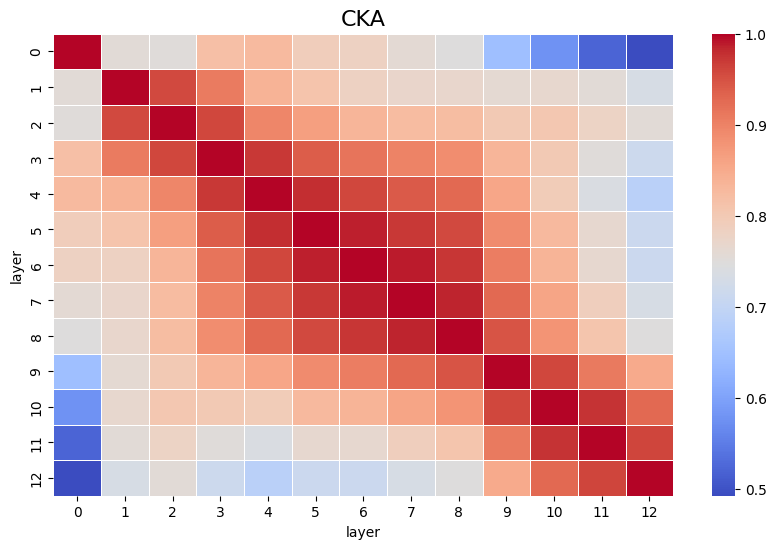

In [ ]:
matr = load_res(PATH + 'CKA.pkl')
plt.figure(figsize=(10, 6))  # Adjust figure size

sns.heatmap(
    matr,
    cmap="coolwarm",  # Color map
    linewidths=0.5  # Cell spacing
)

plt.title("CKA", fontsize=16)
plt.xlabel("layer")
plt.ylabel("layer")

plt.show()

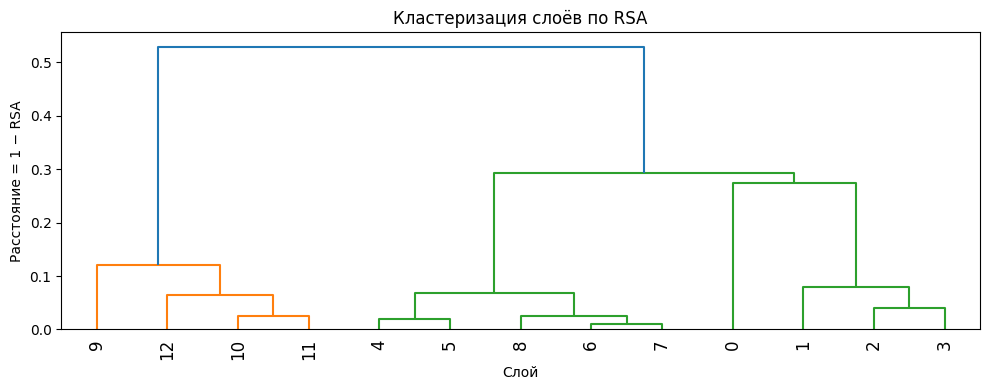

Полученные кластеры слоёв:
  Кластер 1: [9, 10, 11, 12]
  Кластер 2: [4, 5, 6, 7, 8]
  Кластер 3: [1, 2, 3]
  Кластер 4: [0]


In [ ]:
# 2. Из сходства → в расстояние
metr = 'CKA'
dist_mat = 1.0 - matr
condensed = squareform(dist_mat, checks=False)   # форма (n_layers · (n_layers − 1)/2,)

# 3. Иерархическая агломерация (Ward linkage)
linkage = sch.linkage(condensed, method="ward")

# 4. Дендрограмма
plt.figure(figsize=(10, 4))
sch.dendrogram(linkage,
               labels=np.arange(matr.shape[0]),  # подпишем номер слоя
               leaf_rotation=90)
plt.title(f"Кластеризация слоёв по {metr}")
plt.xlabel("Слой")
plt.ylabel(f"Расстояние = 1 − {metr}")
plt.tight_layout()
plt.show()

# 5-a. Сформировать k кластеров
k = 4                                           # ← поменяйте при необходимости
cluster_ids = sch.fcluster(linkage, k, criterion="maxclust")

# 5-b. …или по высоте порога
# threshold = 0.4                               # ← расстояние-порог
# cluster_ids = sch.fcluster(linkage, threshold, criterion="distance")

# 6. Сгруппуем слои по кластерам
clusters = {}
for layer, cid in enumerate(cluster_ids):
    clusters.setdefault(cid, []).append(layer)

print("Полученные кластеры слоёв:")
for cid, layers in sorted(clusters.items()):
    print(f"  Кластер {cid}: {layers}")


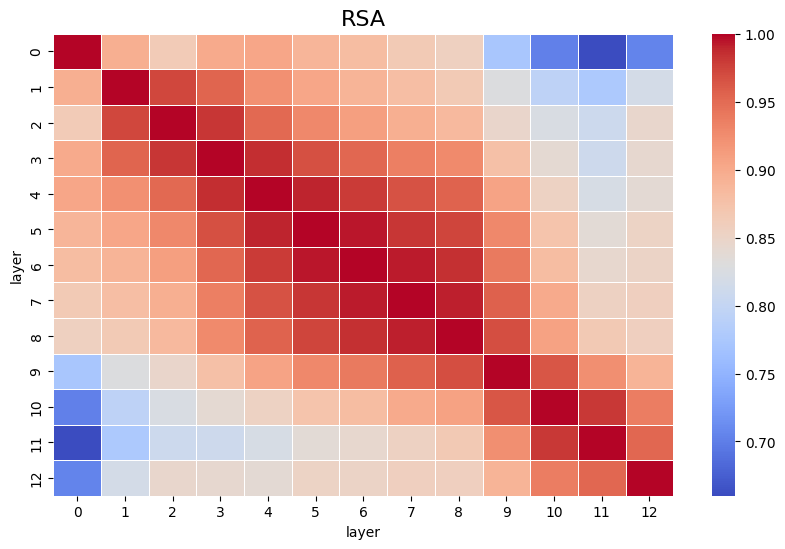

In [ ]:
matr = load_res(PATH + 'RSA.pkl')
plt.figure(figsize=(10, 6))  # Adjust figure size

sns.heatmap(
    matr,
    cmap="coolwarm",  # Color map
    linewidths=0.5  # Cell spacing
)

plt.title("RSA", fontsize=16)
plt.xlabel("layer")
plt.ylabel("layer")

plt.show()

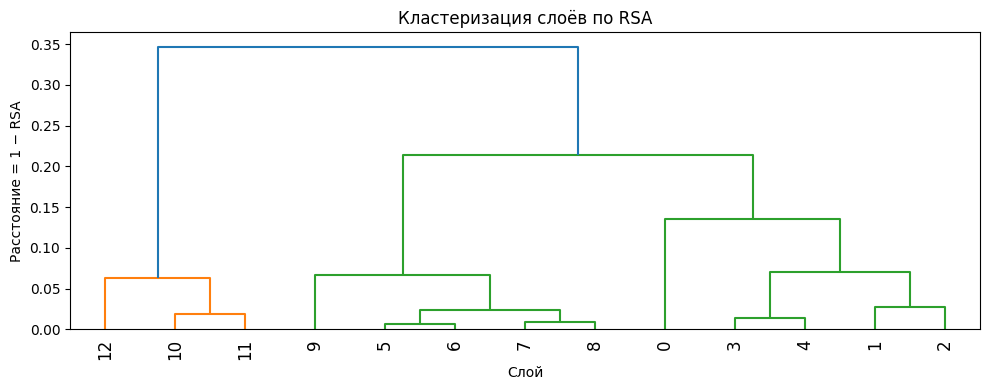

Полученные кластеры слоёв:
  Кластер 1: [10, 11, 12]
  Кластер 2: [5, 6, 7, 8, 9]
  Кластер 3: [1, 2, 3, 4]
  Кластер 4: [0]


In [ ]:
# 2. Из сходства → в расстояние
metr = 'RSA'
dist_mat = 1.0 - matr
condensed = squareform(dist_mat, checks=False)   # форма (n_layers · (n_layers − 1)/2,)

# 3. Иерархическая агломерация (Ward linkage)
linkage = sch.linkage(condensed, method="ward")

# 4. Дендрограмма
plt.figure(figsize=(10, 4))
sch.dendrogram(linkage,
               labels=np.arange(matr.shape[0]),  # подпишем номер слоя
               leaf_rotation=90)
plt.title(f"Кластеризация слоёв по {metr}")
plt.xlabel("Слой")
plt.ylabel(f"Расстояние = 1 − {metr}")
plt.tight_layout()
plt.show()

# 5-a. Сформировать k кластеров
k = 4                                           # ← поменяйте при необходимости
cluster_ids = sch.fcluster(linkage, k, criterion="maxclust")

# 5-b. …или по высоте порога
# threshold = 0.4                               # ← расстояние-порог
# cluster_ids = sch.fcluster(linkage, threshold, criterion="distance")

# 6. Сгруппуем слои по кластерам
clusters = {}
for layer, cid in enumerate(cluster_ids):
    clusters.setdefault(cid, []).append(layer)

print("Полученные кластеры слоёв:")
for cid, layers in sorted(clusters.items()):
    print(f"  Кластер {cid}: {layers}")


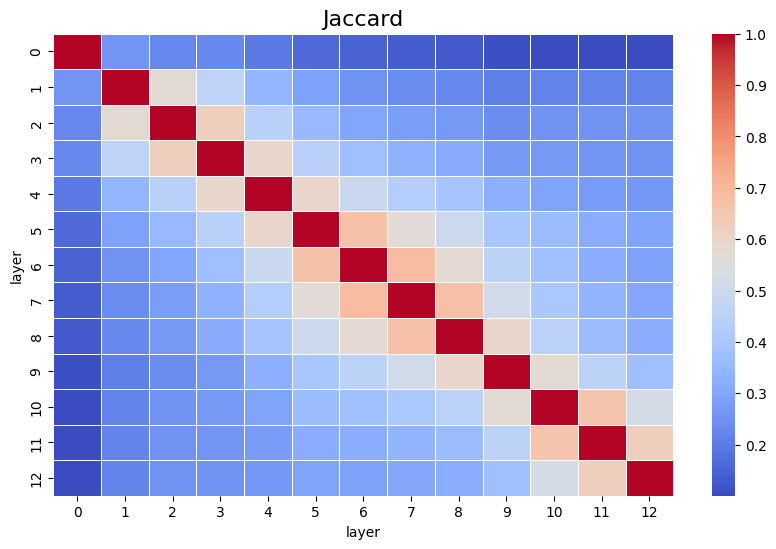

In [ ]:
matr = load_res(PATH + 'JaccardSimilarity.pkl')
plt.figure(figsize=(10, 6))  # Adjust figure size

sns.heatmap(
    matr,
    cmap="coolwarm",  # Color map
    linewidths=0.5  # Cell spacing
)

plt.title("Jaccard", fontsize=16)
plt.xlabel("layer")
plt.ylabel("layer")

plt.show()

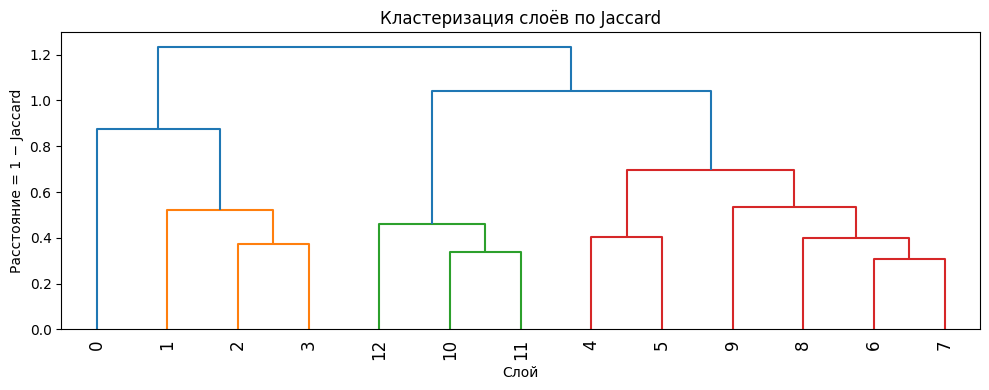

Полученные кластеры слоёв:
  Кластер 1: [1, 2, 3]
  Кластер 2: [0]
  Кластер 3: [10, 11, 12]
  Кластер 4: [4, 5, 6, 7, 8, 9]


In [ ]:
# 2. Из сходства → в расстояние
metr = 'Jaccard'
dist_mat = 1.0 - matr
condensed = squareform(dist_mat, checks=False)   # форма (n_layers · (n_layers − 1)/2,)

# 3. Иерархическая агломерация (Ward linkage)
linkage = sch.linkage(condensed, method="ward")

# 4. Дендрограмма
plt.figure(figsize=(10, 4))
sch.dendrogram(linkage,
               labels=np.arange(matr.shape[0]),  # подпишем номер слоя
               leaf_rotation=90)
plt.title(f"Кластеризация слоёв по {metr}")
plt.xlabel("Слой")
plt.ylabel(f"Расстояние = 1 − {metr}")
plt.tight_layout()
plt.show()

# 5-a. Сформировать k кластеров
k = 4                                           # ← поменяйте при необходимости
cluster_ids = sch.fcluster(linkage, k, criterion="maxclust")

# 5-b. …или по высоте порога
# threshold = 0.4                               # ← расстояние-порог
# cluster_ids = sch.fcluster(linkage, threshold, criterion="distance")

# 6. Сгруппуем слои по кластерам
clusters = {}
for layer, cid in enumerate(cluster_ids):
    clusters.setdefault(cid, []).append(layer)

print("Полученные кластеры слоёв:")
for cid, layers in sorted(clusters.items()):
    print(f"  Кластер {cid}: {layers}")


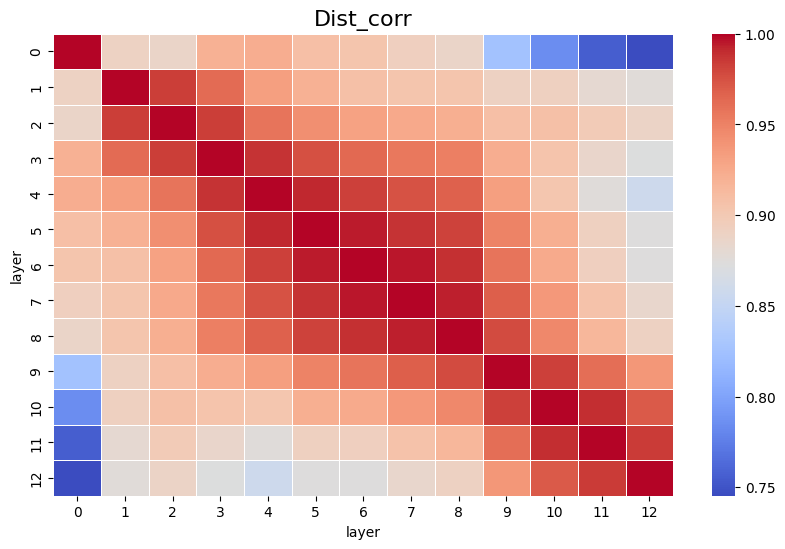

In [ ]:
matr = load_res(PATH + 'DistanceCorrelation.pkl')
plt.figure(figsize=(10, 6))  # Adjust figure size

sns.heatmap(
    matr,
    cmap="coolwarm",  # Color map
    linewidths=0.5  # Cell spacing
)

plt.title("Dist_corr", fontsize=16)
plt.xlabel("layer")
plt.ylabel("layer")

plt.show()

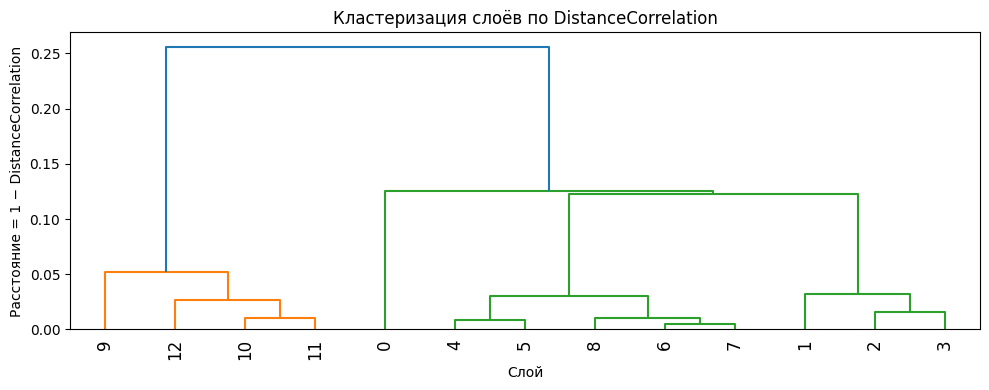

Полученные кластеры слоёв:
  Кластер 1: [9, 10, 11, 12]
  Кластер 2: [4, 5, 6, 7, 8]
  Кластер 3: [1, 2, 3]
  Кластер 4: [0]


In [ ]:
metr = 'DistanceCorrelation'
dist_mat = 1.0 - matr
condensed = squareform(dist_mat, checks=False)   # форма (n_layers · (n_layers − 1)/2,)

# 3. Иерархическая агломерация (Ward linkage)
linkage = sch.linkage(condensed, method="ward")

# 4. Дендрограмма
plt.figure(figsize=(10, 4))
sch.dendrogram(linkage,
               labels=np.arange(matr.shape[0]),  # подпишем номер слоя
               leaf_rotation=90)
plt.title(f"Кластеризация слоёв по {metr}")
plt.xlabel("Слой")
plt.ylabel(f"Расстояние = 1 − {metr}")
plt.tight_layout()
plt.show()

# 5-a. Сформировать k кластеров
k = 4                                           # ← поменяйте при необходимости
cluster_ids = sch.fcluster(linkage, k, criterion="maxclust")

# 5-b. …или по высоте порога
# threshold = 0.4                               # ← расстояние-порог
# cluster_ids = sch.fcluster(linkage, threshold, criterion="distance")

# 6. Сгруппуем слои по кластерам
clusters = {}
for layer, cid in enumerate(cluster_ids):
    clusters.setdefault(cid, []).append(layer)

print("Полученные кластеры слоёв:")
for cid, layers in sorted(clusters.items()):
    print(f"  Кластер {cid}: {layers}")
